<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [2]:
auto.shape

(397, 8)

In [3]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# print(auto[auto['cylinders'] == 4].describe())
# print(auto[auto['cylinders'] == 4].shape)

In [5]:
# print(auto[auto['cylinders'] == 6].describe())
# print(auto[auto['cylinders'] == 6].shape)

In [6]:
# print(auto[auto['cylinders'] == 8].describe())
# print(auto[auto['cylinders'] == 8].shape)

In [7]:
# num_bins = 20
# n, bins, patches = plt.hist(auto['mpg'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [8]:
# box-cox needed
# num_bins = 20
# n, bins, patches = plt.hist(auto['horsepower'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [9]:
# box-cox needed
# num_bins = 20
# n, bins, patches = plt.hist(auto['weight'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [10]:
# close to normal
# num_bins = 20
# n, bins, patches = plt.hist(auto['acceleration'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [11]:
# num_bins = 20
# n, bins, patches = plt.hist(auto['year'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [12]:
# num_bins = 20
# n, bins, patches = plt.hist(auto['origin'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [13]:
# num_bins = 20
# n, bins, patches = plt.hist(auto['cylinders'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [27]:
# Command(s)
auto.isnull().values.any()
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [28]:
# Command:
auto[auto.isnull().any(axis=1)]
# Comment (One - two sentence)
# These generally seem to be 4 cyclinder engines but other than that they seem to be missing at random.
# This could have been a data entry error. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


## Q2 Comment
These generally seem to be 4 cyclinder engines but other than that they seem to be missing at random.
This could have been a data entry error. 

<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

Horsepower Median - all cars 93.5
Horsepower median - 4 cylinder 78.0


/Users/jason_whittle/anaconda3/envs/uw_base/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jason_whittle/anaconda3/envs/uw_base/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


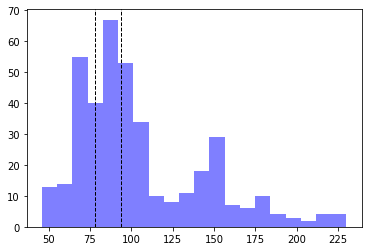

In [29]:
print("Horsepower Median - all cars", auto['horsepower'].median())
print("Horsepower median - 4 cylinder", auto[auto['cylinders']==4]['horsepower'].median())
num_bins = 20
n, bins, patches = plt.hist(auto['horsepower'], num_bins, facecolor='blue', alpha=0.5)
plt.axvline(auto['horsepower'].median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(auto[auto['cylinders']==4]['horsepower'].median(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [30]:
# Command(s):
auto.fillna(auto.median(), inplace=True)

## Q3 Comment

This is a descent approach in this case since there are a small number of missing values and median imputation will not dramatically effect the distribution of the horsepower column. It could be a little higher than it should be since most of the missing values were from 4 cylinder cars. 

<h3>Q.4. Develop a Linear Regression model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [31]:
# Develop the model 
import statsmodels.api as sm
X = auto.iloc[:,1:]
X = sm.add_constant(X)
y = auto['mpg']

model = sm.OLS(y, X).fit()
print(model.summary())
# Comment on its quality 
# markdown below

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          2.22e-141
Time:                        20:02:14   Log-Likelihood:                -1037.3
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.4740      4.621     -3.998   

## Q4 Comment
The initial regression achieves an r-squared of.822 and clearly has some issues with the residule plot (not normally distributed). 

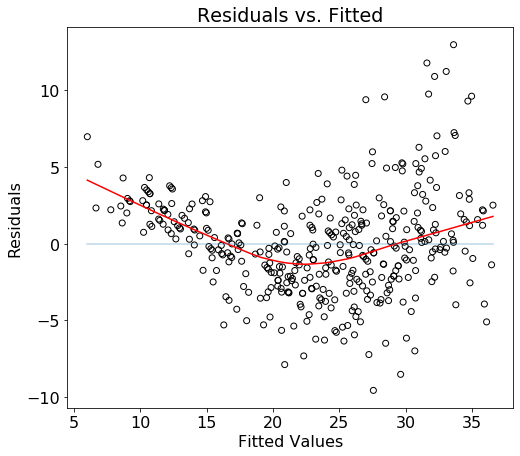

In [32]:
# Plot residuals
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals = model.resid
fitted = model.fittedvalues
smoothed = lowess(residuals,fitted)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0], alpha = .3)

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

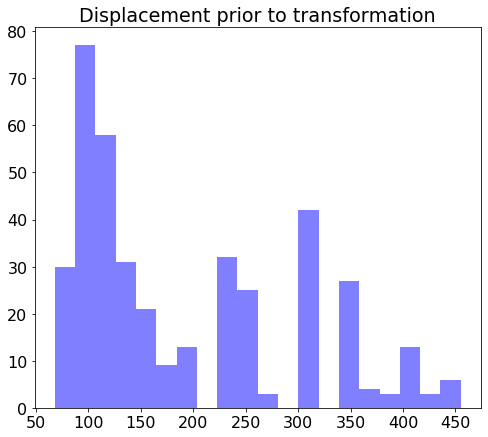

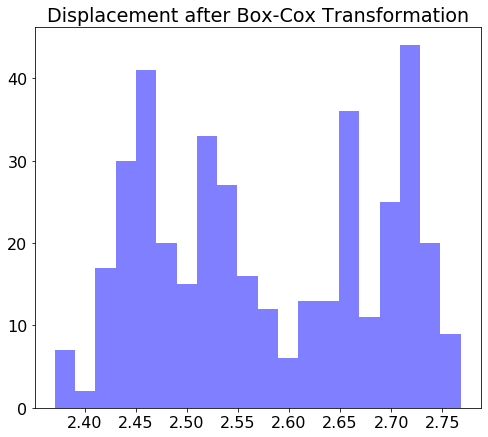

In [33]:
# Histogram of engine displacement
num_bins = 20
n, bins, patches = plt.hist(auto['displacement'], num_bins, facecolor='blue', alpha=0.5)
plt.title('Displacement prior to transformation')
plt.show()

# Plot histogram of this new feature to reveal normal-like distribution
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing

X_bc = auto['displacement'].to_numpy()

pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_bc = X_bc.reshape(-1,1)
auto['displacement'] = pt.fit_transform(X_bc)


num_bins = 20
n, bins, patches = plt.hist(auto['displacement'], num_bins, facecolor='blue', alpha=0.5)
plt.title('Displacement after Box-Cox Transformation')
plt.show()

<h3>Q.7. Recalculate the Linear Regression model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [34]:
# Calculate then new model
X_bc = auto.iloc[:,1:]
X_bc = sm.add_constant(X_bc)
y = auto['mpg']
# print(X_bc.head())

model_2 = sm.OLS(y, X_bc).fit()
print(model_2.summary())

# Comment on its performance
# markdown below

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          1.97e-145
Time:                        20:02:15   Log-Likelihood:                -1027.8
No. Observations:                 397   AIC:                             2072.
Df Residuals:                     389   BIC:                             2103.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           50.2656     14.357      3.501   

## Q7 Comment
Transforming displacement imporoved the model performance slightly achieving an r-squared of .83, however it didn't improve the residuals plot much. 

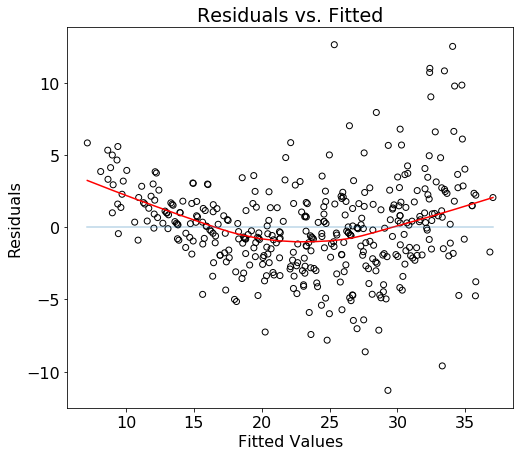

In [35]:
# Plot residuals
residuals = model_2.resid
fitted = model_2.fittedvalues
smoothed = lowess(residuals,fitted)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0], alpha = .3)

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [36]:
print(auto.describe()[1:3])

            mpg  cylinders  displacement  horsepower       weight  \
mean  23.515869   5.458438      2.579582  104.331234  2970.261965   
std    7.825804   1.701577      0.110132   38.266994   847.904119   

      acceleration       year    origin  
mean     15.555668  75.994962  1.574307  
std       2.749995   3.690005  0.802549  


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the Linear Regression model, comment on its performance.</h3>

In [37]:
# Center and scale

# transforming weight and Horsepower with Box-Cox
X_hp_bc = auto['horsepower'].to_numpy()
X_hp_bc = X_hp_bc.reshape(-1,1)
auto['horsepower'] = pt.fit_transform(X_hp_bc)

X_wgt_bc = auto['weight'].to_numpy()
X_wgt_bc = X_wgt_bc.reshape(-1,1)
auto['weight'] = pt.fit_transform(X_wgt_bc)


X_names = auto.iloc[:, 1:].columns
X_scale = preprocessing.scale(auto.iloc[:,1:])
X_scale = pd.DataFrame(X_scale, columns=X_names)
X_scale = sm.add_constant(X_scale)


# Recalculate the model
model_3 = sm.OLS(y, X_scale).fit()
print(model_3.summary())
# Comment on its performance

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     327.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          1.01e-158
Time:                        20:02:15   Log-Likelihood:                -996.49
No. Observations:                 397   AIC:                             2009.
Df Residuals:                     389   BIC:                             2041.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.5159      0.151    155.766   

### Q 9 Comment
Initially just centering and scaling the variables didn't improve or change the performace of the third linear regression compared to the second. I proceeded to transform the non-Gausian distribution features weight and horsepower using Box-Cox prior to centering and scaling and the model improved a fair amount to an r-squared of .855 and made the residule plot look a lot better. Origin and Cylinders should probably be reconsidered as variables and turned into several dummy variables (i.e. 6 cylinder, 8 cylinder, origin 2, origin 3). 

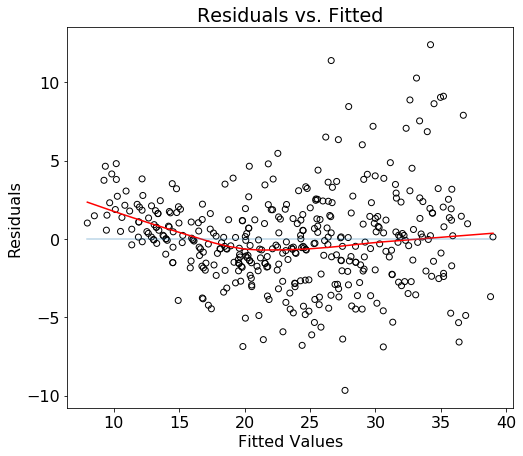

In [38]:
# Plot residuals
residuals = model_3.resid
fitted = model_3.fittedvalues
smoothed = lowess(residuals,fitted)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0], alpha = .3)

In [39]:
# horsepower after transformation
# num_bins = 20
# n, bins, patches = plt.hist(X_scale['horsepower'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

In [40]:
# weight after transformation
# num_bins = 20
# n, bins, patches = plt.hist(X_scale['weight'], num_bins, facecolor='blue', alpha=0.5)
# plt.show()

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

I found the sklearn transformer tricky and ended up having to switch back and forth between an np.array and a pandas DataFrame which I am sure was unnecessary. I also found that adding an intercept term was really useful for the regression performance. 